In [133]:
import pandas as pd
import numpy as np
from matplotlib import patches, pyplot as plt
import squarify

## Define some variables 

In [134]:
from_year = 2000
to_year = 2020

In [135]:
regions = ['Europe', 'Asia', 'South America', 'North America', 'Africa', 'Oceania']
regions.sort()
region_colors = {
    'Africa': 'brown',
    'Asia': 'red',
    'Europe': 'blue',
    'North America': 'green',
    'Oceania': 'teal',
    'South America': 'orange',
}

In [136]:
technology_color_dict = { 
    "Solar": "orange",
    "Offshore wind": "slateblue",
    "Onshore wind": "blue",
}

## Load the data

In [137]:
energy_demand_data = pd.read_csv('./World Energy Demand.csv')
energy_demand_data.sort_values(by=['year'], inplace=True)

energy_demand_data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
6562,Europe,1900,NaN,406610221.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9412,Iran,1900,IRN,10122370.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8339,Guatemala,1900,GTM,1352626.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15258,Oceania,1900,NaN,5936615.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16332,Poland,1900,POL,24312686.0,6.682500e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
renewable_energy_costs_data = pd.read_csv('./lcoe_renewable_energy.csv', delimiter=";")
renewable_energy_costs_data.set_index('year', inplace=True)

renewable_energy_costs_data.head()

,lcoe usd per kwh bioenergy,lcoe usd per kwh geothermal,lcoe usd per kwh hydropower,lcoe usd per kwh solar,lcoe usd per kwh csp,lcoe usd per kwh onshore wind,lcoe usd per kwh offshore wind
year,,,,,,,
2010,0.082,0.053,0.042,0.445,0.380,0.107,0.197
2011,0.079,NaN,0.039,0.332,0.368,0.102,0.206
2012,0.068,0.091,0.041,0.248,0.357,0.093,0.175
2013,0.086,0.068,0.045,0.191,0.282,0.094,0.149
2014,0.087,0.069,0.045,0.172,0.248,0.084,0.182


In [139]:
energy_capacity_data = pd.read_csv('./RECAP_20231127-154011.csv', delimiter=",")
energy_capacity_data.head()

,Region/country/area,Technology,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,World,Hydropower,782156.806,789888.178,802804.584,823138.826,845365.282,870961.832,895007.176,926119.358,...,1137301.886,1175773.068,1210485.674,1245999.238,1270980.987,1293983.708,1312349.044,1334350.424,1362086.636,1392512.209
1,World,Renewable hydropower,697190.256,709088.628,720229.034,740451.276,761366.732,784119.282,805482.626,832419.808,...,1029572.642,1066302.324,1098583.930,1129092.454,1151137.323,1173623.544,1191742.880,1213171.500,1234382.112,1255454.185
2,World,Pumped storage,84966.550,80799.550,82575.550,82687.550,83998.550,86842.550,89524.550,93699.550,...,107729.244,109470.744,111901.744,116906.784,119843.664,120360.164,120606.164,121178.924,127704.524,137058.024
3,World,Marine,237.750,239.750,242.750,243.750,242.750,240.750,239.750,242.050,...,509.616,513.027,512.338,522.468,526.764,526.856,524.836,523.391,523.068,523.348
4,World,Wind,16964.244,23972.666,30735.013,38670.717,47684.973,58408.316,73161.274,91543.825,...,300051.920,349540.627,416421.401,467013.170,515082.306,563864.083,622779.606,733564.569,825663.023,898855.912


## Apply some preprocessing & transformation

In [140]:
capacity_data_melted = energy_capacity_data.melt(id_vars=['Region/country/area', 'Technology'], var_name='Year', value_name='Capacity')
capacity_data_melted['Year'] = capacity_data_melted['Year'].astype(int)

capacity_data_agg = capacity_data_melted.groupby(['Year', 'Technology']).sum().reset_index()
capacity_data_agg.head()

,Year,Technology,Region/country/area,Capacity
0,2000,Bagasse,World,4277.739
1,2000,Bioenergy,World,28428.425
2,2000,Biogas,World,2889.805
3,2000,Concentrated solar power,World,419.000
4,2000,Geothermal,World,8272.950


In [141]:
for column in renewable_energy_costs_data.columns[1:]:
    # multiply each column with 1000 to convert from kWh to MWh
    renewable_energy_costs_data[column] = renewable_energy_costs_data[column].apply(lambda x: x * 1000)

renewable_energy_costs_data.rename(columns={"lcoe usd per kwh bioenergy": "Bioenergy", "lcoe usd per kwh geothermal": "Geothermal", "lcoe usd per kwh hydropower": "Hydropower", "lcoe usd per kwh solar": "Solar", "lcoe usd per kwh csp": "CSP", "lcoe usd per kwh onshore wind": "Onshore wind", "lcoe usd per kwh offshore wind": "Offshore wind"},
                  inplace=True)

technologies_to_chart = ["Solar", "Offshore wind", "Onshore wind"]

In [142]:
capacity_years = [int(year) for year in energy_capacity_data.columns[2:]]
capacity_first_common_year = max(renewable_energy_costs_data.index.min(), min(capacity_years))
capacity_latest_common_year = min(renewable_energy_costs_data.index.max(), max(capacity_years))

combined_plot_data = []
for year in range(capacity_first_common_year, capacity_latest_common_year):
    for technology in technologies_to_chart:
        cost = renewable_energy_costs_data.loc[year][technology]
        capacity = capacity_data_agg.query("Technology == @technology and Year == @year")["Capacity"]
        combined_plot_data.append({"year": year, "technology": technology, "cost": cost, "capacity": int(capacity.iloc[0])})

combined_plot_data_df = pd.DataFrame(combined_plot_data)

In [143]:
electricity_demand_data = energy_demand_data[['country', 'year', 'electricity_demand']]
electricity_demand_data = electricity_demand_data.dropna(subset=['electricity_demand'])
electricity_demand_data = electricity_demand_data[electricity_demand_data['year'] >= from_year]
electricity_demand_data = electricity_demand_data[electricity_demand_data['year'] <= to_year]
electricity_demand_data = electricity_demand_data[(electricity_demand_data['country'].isin(regions))]

In [144]:
electricity_mix_data = energy_demand_data[['country', 'year', 'iso_code', 'coal_share_elec', 'oil_share_elec', 'gas_share_elec', 'hydro_share_elec', 'nuclear_share_elec', 'wind_share_elec', 'solar_share_elec', 'biofuel_share_elec']]
electricity_mix_data = electricity_mix_data[electricity_mix_data['year'] >= from_year]
electricity_mix_data = electricity_mix_data[electricity_mix_data['year'] <= to_year]
electricity_mix_data = electricity_mix_data[electricity_mix_data['country'] == "World"]

## Plot renewable energy costs vs. capacity

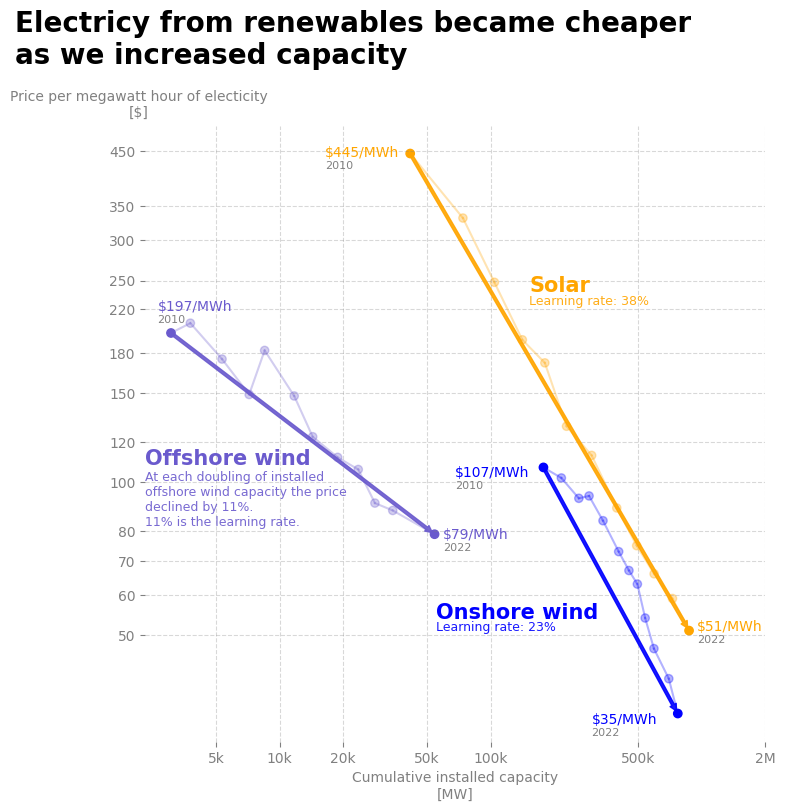

In [145]:
fig, ax = plt.subplots(figsize=(8, 8))

for technology in technologies_to_chart:
    data = combined_plot_data_df.query("technology == @technology")
    color = technology_color_dict[technology]
    alphas = [0.3] * len(data)
    alphas[0] = 1    # highlight first point
    alphas[-1] = 1   # highlight last point

    for i in range(1, len(data)):
        ax.plot([data["capacity"].iloc[i-1], data["capacity"].iloc[i]], 
                [data["cost"].iloc[i-1], data["cost"].iloc[i]],
                color=color, alpha=0.3)

    ax.scatter(data["capacity"], data["cost"], color=color, alpha=alphas)

    (cost_beginning, capacity_beginning) = data["cost"].iloc[0], data["capacity"].iloc[0]
    (cost_end, capacity_end) = data["cost"].iloc[-1], data["capacity"].iloc[-1]

    # arrow from first point to last point
    ax.annotate("", xy=(capacity_end, cost_end), 
                xytext=(capacity_beginning, cost_beginning),
                arrowprops=dict(arrowstyle="simple", color=color, alpha=0.9))
    

def add_data_start_end_labels(x_start, y_start, x_end, y_end, technology):
    technology_data = combined_plot_data_df.query("technology == @technology")
    cost_beginning = technology_data["cost"].iloc[0]
    cost_end = technology_data["cost"].iloc[-1]

    ax.text(s=f"${cost_beginning:.0f}/MWh", x=x_start, y=y_start, color=technology_color_dict[technology],
            fontsize=10,
            transform=ax.transAxes)
    ax.text(s=capacity_first_common_year, x=x_start, y=y_start - 0.02, color="grey",
            fontsize=8,
            transform=ax.transAxes)
    ax.text(s=f"${cost_end:.0f}/MWh", x=x_end, y=y_end, color=technology_color_dict[technology],
            fontsize=10,
            transform=ax.transAxes)
    ax.text(s=capacity_latest_common_year, x=x_end, y=y_end - 0.02, color="grey",
            fontsize=8,
            transform=ax.transAxes)

def add_technology_label(x, y, technology):
    ax.text(s=technology, x=x, y=y, color=technology_color_dict[technology],
            fontsize=15,
            fontweight="bold",
            transform=ax.transAxes)

def add_learning_rate_label(x, y, technology, text):
    ax.text(s=text, x=x, y=y, alpha=0.9, color=technology_color_dict[technology],
        fontsize=9,
        transform=ax.transAxes)

# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Cumulative installed capacity\n[MW]", color="grey", fontsize=10)
ax.set_ylabel("Price per megawatt hour of electicity\n[$]", rotation="horizontal", color="grey", fontsize=10)
ax.yaxis.set_label_coords(-0.01, 1.01)
ax.grid(True, color="grey", alpha=0.3, linestyle="--")
ax.minorticks_off()

# Write the title of the graph
ax.text(-0.21, 1.1,
         'Electricy from renewables became cheaper\nas we increased capacity', # Title ('\n' allows you to go to the line)
         fontsize=20, # High font size for style
         color='black',
         fontweight = 'bold',
         transform=ax.transAxes)

ax.tick_params(colors='gray', which='both')
ax.set_yticks([50, 60, 70, 80, 100, 120, 150, 180, 220, 250, 300, 350, 450], minor=False)
ax.set_yticklabels(["50", "60", "70", "80", "100", "120", "150", "180", "220", "250", "300", "350", "450"])

ax.set_xticks([5000, 10000, 20000, 50000, 100000, 500000, 2000000], minor=False)
ax.set_xticklabels(["5k", "10k", "20k", "50k", "100k", "500k", "2M"])

add_data_start_end_labels(0.29, 0.95, 0.89, 0.18, "Solar")
add_data_start_end_labels(0.02, 0.7, 0.48, 0.33, "Offshore wind")
add_data_start_end_labels(0.5, 0.43, 0.72, 0.029, "Onshore wind")

add_technology_label(0.62, 0.73, "Solar")
add_technology_label(0.0, 0.45, "Offshore wind")
add_technology_label(0.47, 0.2, "Onshore wind")

add_learning_rate_label(0.62, 0.71, "Solar", "Learning rate: 38%")
add_learning_rate_label(0.0, 0.35, "Offshore wind", "At each doubling of installed\noffshore wind capacity the price\ndeclined by 11%.\n11% is the learning rate.")
add_learning_rate_label(0.47, 0.18, "Onshore wind", "Learning rate: 23%")

## Plot global electricity demand over time

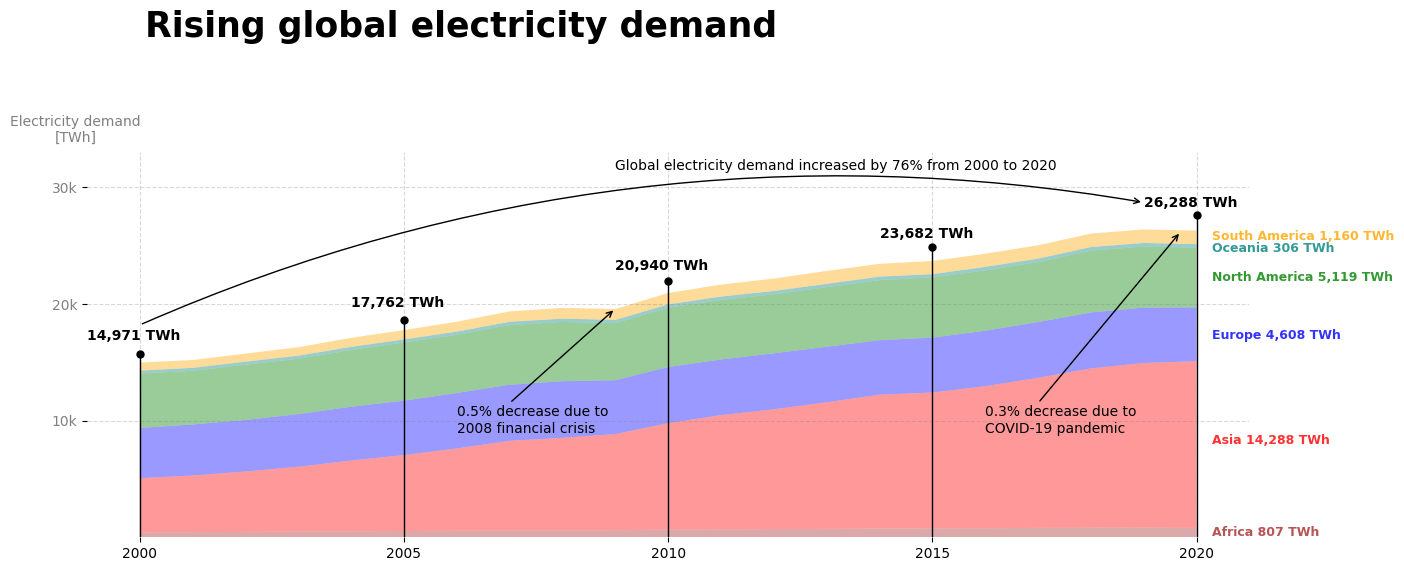

In [146]:
fig, ax = plt.subplots(figsize=(15, 5))

electricity_demand_pivot = electricity_demand_data.pivot(index='year', columns='country', values='electricity_demand').fillna(0)
first_year_demand_data = electricity_demand_pivot.loc[from_year]
last_year_demand_data = electricity_demand_pivot.loc[to_year]

ax.stackplot(electricity_demand_pivot.index, electricity_demand_pivot.T, labels=electricity_demand_pivot.columns, alpha=0.4,
             colors=[region_colors[region] for region in regions])

ax.set_xlabel('')
ax.set_ylabel("Electricity demand\n[TWh]", rotation="horizontal", color="grey", fontsize=10)
ax.yaxis.set_label_coords(-0.01, 1.02)

ax_set_ylim = ax.set_ylim(0, 33000)

x_ticks = [year for year in range(from_year, to_year + 1, 5)]
ax.set_xticks(x_ticks)

ax.set_yticks([10000, 20000, 30000])
ax.set_yticklabels(["10k", "20k", "30k"], color="grey")

# Write the title of the graph
ax.text(0.05, 1.3,
         'Rising global electricity demand', # Title ('\n' allows you to go to the line)
         fontsize=25, # High font size for style
         color='black',
         fontweight = 'bold',
         transform=ax.transAxes)

# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Annotations for the values per country
def add_annotations_country(region, value_placement, amount, color):
    """
    Adds an annotation to a plot at a specific location with information about a region's amount in TwH.

    Parameters:
        region (str): The name of the region for which the annotation is being added.
        value_placement (float): The vertical position where the annotation will be placed on the plot.
        amount (float): The amount that will be displayed in the annotation.
        color (str): The color of the annotation text.
    """
    ax.text(2020.3, value_placement, f'{region} {amount:,.0f} TWh', fontsize=9, color=color, fontweight='bold', alpha=0.8)


# We manually define the labels, values and position that will be displayed on the right of the graph
values_placement = np.array([0.12, 8, 17, 22, 24.5, 25.5]) * 1000
amounts = electricity_demand_pivot.query("year == @to_year").values[0][0:]

# Iterate over all countries and add the name with the right value and color
for region, value, amount in zip(regions, values_placement, amounts):
    add_annotations_country(region, value, amount, region_colors[region])

# Annotations for the values per year
def add_annotations_year(year):
    """
    Input: a year
    Apply: add to the graph the total demand of all countries at a given date
           and a line from the bottom of the graph to the total value of demand
    """
    
    # Calculate total amount of demand at a given year
    y_end = electricity_demand_pivot.query("year == @year").values.sum()

    # Set values in areas where the graph does not appear
    modif_xaxis = -1
    modif_yaxis = 2000
    
    # Add the values, with a specific position, in bold, black and a fontsize of 10
    ax.text(year+modif_xaxis,
             y_end+modif_yaxis,
             f'{y_end:,.0f} TWh',
             fontsize=10,
             color='black',
             fontweight = 'bold')
    
    # Add line 
    ax.plot([year, year], # x-axis position
            [0, y_end*1.05], # y-axis position (*1.05 is used to make a it little bit longer)
            color='black', # Color
            linewidth=1) # Width of the line
    
    # Add a point at the top of the line
    ax.plot(year, # x-axis position
            y_end*1.05, # y-axis position (*1.05 is used to make a it little bit longer)
            marker='o', # Style of the point
            markersize=5, # Size of the point
            color='black') # Color

# Add the line and the values for each of the following years
for year in x_ticks:
    add_annotations_year(year)

## Add arrow from 2000 to 2020
ax.annotate("", xytext=(2000, 18200), xy=(2019, 28700),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.15"))

relative_increase = ((last_year_demand_data.sum() / first_year_demand_data.sum()) - 1) * 100
annotext = ax.text(x=2009, y=31500, s=f"Global electricity demand increased by {relative_increase:.0f}% from {from_year} to {to_year}",
                   color="black", fontsize=10)

## Add arrow for 2008 financial crisis
ax.annotate("", xytext=(2007, 11500), xy=(2009, 19600),
            arrowprops=dict(arrowstyle="->"))
annotext = ax.text(x=2006, y=9000, s="0.5% decrease due to\n2008 financial crisis",
                   color="black", fontsize=10)

## Add arrow for 2020 covid pandemic
ax.annotate("", xytext=(2017, 11500), xy=(2019.7, 26200),
            arrowprops=dict(arrowstyle="->"))
annotext = ax.text(x=2016, y=9000, s="0.3% decrease due to\nCOVID-19 pandemic",
                   color="black", fontsize=10)

ax.grid(True, color="grey", alpha=0.3, linestyle="--")

## Plot electricity demand for different regions

<BarContainer object of 1 artists>

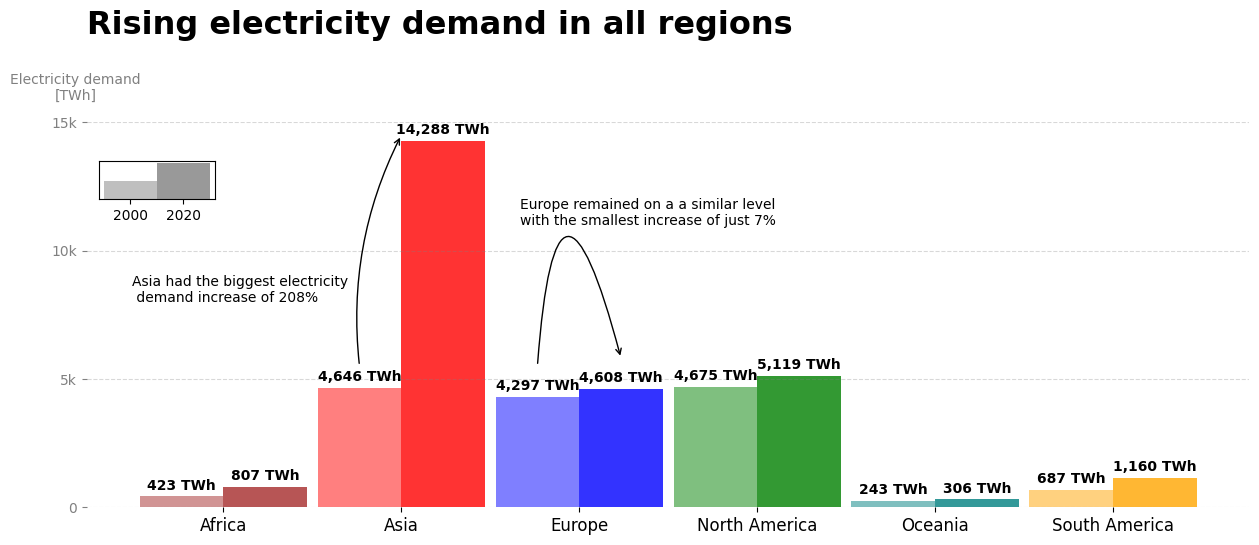

In [147]:
fig, ax = plt.subplots(figsize=(15, 5))

df = pd.DataFrame(columns=['year', 'region', 'electricity_demand'],
                  data=[[from_year, region, first_year_demand_data[region]] for region in regions] + [[to_year, region, last_year_demand_data[region]] for region in regions])

x = np.arange(len(regions)) # the label locations
width = 0.47 # the width of the bars
multiplier = 0

for year in [from_year, to_year]:
    measurement = df[df['year'] == year]['electricity_demand']

    offset = width * multiplier
    alpha = 0.5 if year == from_year else 0.8

    rects = ax.bar(x + offset, measurement, width, label=year, color=region_colors.values(), alpha=alpha)
    ax.bar_label(rects, padding=3, fmt='{:,.0f} TWh', fontweight="bold")
    multiplier += 1

ax.minorticks_off()

ax.set_xticks(x + width / 2, regions, minor=False)
ax.tick_params(axis='x', which='major' ,colors='black', labelsize=12)

ax.set_yticks([0, 5000, 10000, 15000])
ax.tick_params(axis='y', which='both', colors='gray')

ax.set_yticklabels(["0", "5k", "10k", "15k"])

ax.set_ylim(0, 15000)

# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add arrow for Asia
ax.annotate("", xytext=(1, 5500), xy=(1 + width / 2, 14500),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.15"))

relative_increase_asia = 207.56
annotext = ax.text(x=-0.28, y=8000, s=f"Asia had the biggest electricity\n demand increase of {relative_increase_asia:.0f}%",
                   color="black", fontsize=10)

# Add arrow for Europe
ax.annotate("", xytext=(2, 5500), xy=(2 + width, 5800),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-3"))

relative_increase_europe = 7.24
annotext = ax.text(x=1.9, y=11000, s=f"Europe remained on a a similar level\nwith the smallest increase of just {relative_increase_europe:.0f}%",
                   color="black", fontsize=10)

ax.grid(True, color="grey", alpha=0.3, linestyle="--", axis="y")

# Write the title of the graph
ax.text(0, 1.23,
         'Rising electricity demand in all regions', # Title ('\n' allows you to go to the line)
         fontsize=23, # High font size for style
         color='black',
         fontweight = 'bold',
         transform=ax.transAxes)

ax.set_ylabel("Electricity demand\n[TWh]", rotation="horizontal", color="grey", fontsize=10)
ax.yaxis.set_label_coords(-0.01, 1.05)

# Draw the legend as a separate plot
axin = ax.inset_axes([0.01, 0.8, 0.1, 0.1])
axin.set_xticks([0, 0.8])
axin.set_xticklabels([from_year, to_year])
axin.set_yticks([])
axin.bar(x=[0], height=[1], color="gray", alpha=0.5)
axin.bar(x=[0.8], height=[2], color="gray", alpha=0.8)

## Plot change of electricity mix

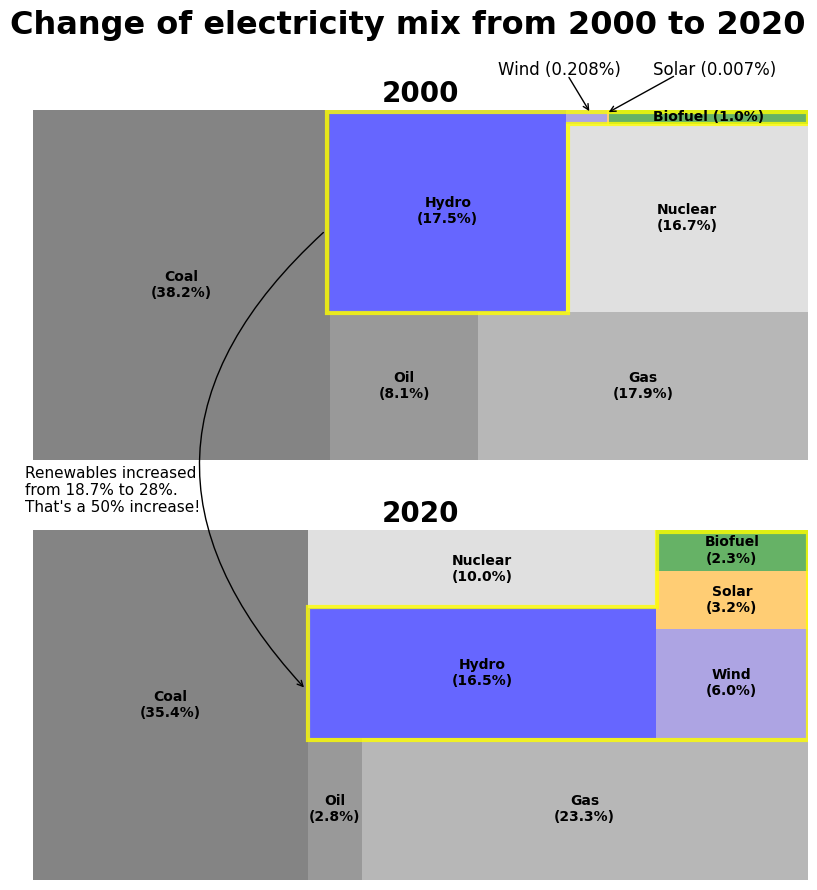

In [175]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

first_year_data = electricity_mix_data[electricity_mix_data['year'] == from_year].drop(columns=['country', 'year', 'iso_code']).T
last_year_data = electricity_mix_data[electricity_mix_data['year'] == to_year].drop(columns=['country', 'year', 'iso_code']).T

#        Coal      Oil       Gas       Hydro   Nuclear    Wind     Solar     Biofuel
colors = ['#333333','#555555','#888888','blue','#cccccc','#7767D1','#FFAD17', 'green']

first_year_labels = [str.capitalize(str.split(first_year_data.index[i], "_")[0]) for i in range(len(first_year_data))]
last_year_labels = [str.capitalize(str.split(last_year_data.index[i], "_")[0]) for i in range(len(last_year_data))]

# add the percentage to the label
for i in range(len(first_year_data)):
    tech = first_year_labels[i]
    value = first_year_data.values[i][0]

    line_sep = " " if tech == "Biofuel" else "\n"
    first_year_labels[i] += f'{line_sep}({value:.1f}%)'

    if value < 0.5:
        first_year_labels[i] = ""


for i in range(len(last_year_data)):
    last_year_labels[i] += f'\n({last_year_data.values[i][0]:.1f}%)'

text_kwargs = {
    'fontsize': 10,
    'fontweight': 'bold',
    'zorder': 100
}

squarify.plot(sizes=first_year_data.values, label=first_year_labels, alpha=0.6, ax=axs[0], color=colors, text_kwargs=text_kwargs)
squarify.plot(sizes=last_year_data.values, label=last_year_labels, alpha=0.6, ax=axs[1], color=colors, text_kwargs=text_kwargs)
axs[0].set_axis_off()
axs[1].set_axis_off()

# Write the title of the graph
fig.suptitle('Change of electricity mix from 2000 to 2020', fontsize=23, fontweight = 'bold')

axs[0].set_title(f'{from_year}', fontsize=20, fontweight = 'bold')
axs[1].set_title(f'{to_year}', fontsize=20, fontweight = 'bold')

# Add annotation for wind in 2000
axs[0].annotate("", xytext=(69, 110), xy=(72, 99),
            arrowprops=dict(arrowstyle="->"), transform=axs[0].transAxes)

axs[0].text(x=60, y=110, s=f"Wind (0.208%)",
                   color="black", fontsize=12)

# Add annotation for solar in 2000
axs[0].annotate("", xytext=(83, 110), xy=(74, 99),
            arrowprops=dict(arrowstyle="->"), transform=axs[0].transAxes)

axs[0].text(x=80, y=110, s=f"Solar (0.007%)",
                   color="black", fontsize=12)

# draw polygon around hydro, wind and solar in 2000 and 2020
highlighing_color = "yellow"
highlighing_alpha = 0.8

first_poly = plt.Polygon([[38, 42], [69, 42], [69, 96], [100, 96], [100, 99.5], [38, 99.5]], fill=False, edgecolor=highlighing_color, linewidth=3, alpha=highlighing_alpha)
second_poly = plt.Polygon([[35.5, 40], [100, 40], [100, 99.5], [80.5, 99.5], [80.5, 78], [35.5, 78]], fill=False, edgecolor=highlighing_color, linewidth=3, alpha=highlighing_alpha)
axs[0].add_patch(first_poly)
axs[1].add_patch(second_poly)

# draw arrow from renawables in 2000 to 2020
arrow = patches.ConnectionPatch(
    [37.5, 65],
    [35, 55],
    coordsA=axs[0].transData,
    coordsB=axs[1].transData,
    color="black",
    arrowstyle="->",  # "normal" arrow
    connectionstyle="arc3,rad=0.5",
)
fig.patches.append(arrow)

# add annotation for increase
axs[0].text(x=-1, y=-15, s=f"Renewables increased\nfrom 18.7% to 28%.\nThat's a 50% increase!",
                   color="black", fontsize=11);